This Jupyter Notebook is a revised version of a notebook originally from the StarDist project (URL: https://github.com/stardist/stardist/blob/master/examples/3D/2_training.ipynb). The programs included in this notebook are based on a wrapper that was written by Chentao Wen for the StarDist package.

Please shutdown all other training/prediction notebooks before running this notebook (as those might occupy the GPU memory otherwise).

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import CellTracker.stardistwrapper as sdw

/tmp/ipykernel_6429/469011404.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Load Data
This cell loads training images and labels for the StarDist model. The file paths for the training images and labels are specified using the variables `path_train_images` and `path_train_labels`, respectively. The file paths are in the form of a Unix glob pattern that matches all files with the extension .tif in the respective directories.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.66it/s]


number of images:   2
- training:         1
- validation:       1
X[0].shape=(21, 512, 1024)


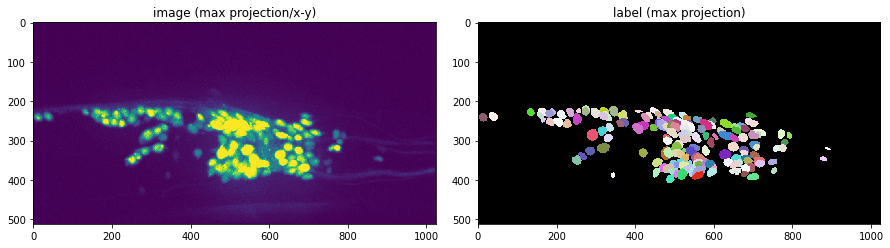

In [2]:
path_train_images = './stardist_01/data/train/images/*.tif'
path_train_labels = './stardist_01/data/train/labels/*.tif'
X, Y, X_trn, Y_trn, X_val, Y_val, n_channel = \
    sdw.load_training_images(path_train_images, path_train_labels, max_projection=True)

# Configuration

The `configure` function is utilized to specify a `StarDist3D` model, where the `model_name` parameter is utilized to save the trained model for retrieval at a later time.

In [3]:
model = sdw.configure(Y, n_channel, model_name="stardist")

empirical anisotropy of labeled objects = (6.0, 1.0909090909090908, 1.0)
div_by=(4, 8, 8)
n_dim: 3
axes: ZYXC
n_channel_in: 1
n_channel_out: 97
train_checkpoint: weights_best.h5
train_checkpoint_last: weights_last.h5
train_checkpoint_epoch: weights_now.h5
n_rays: 96
grid: (1, 2, 2)
anisotropy: (6.0, 1.0909090909090908, 1.0)
backbone: unet
rays_json: {'name': 'Rays_GoldenSpiral', 'kwargs': {'n': 96, 'anisotropy': (6.0, 1.0909090909090908, 1.0)}}
n_classes: None
unet_n_depth: 2
unet_kernel_size: (3, 3, 3)
unet_n_filter_base: 32
unet_n_conv_per_depth: 2
unet_pool: (2, 2, 2)
unet_activation: relu
unet_last_activation: relu
unet_batch_norm: False
unet_dropout: 0.0
unet_prefix: 
net_conv_after_unet: 128
net_input_shape: (None, None, None, 1)
net_mask_shape: (None, None, None, 1)
train_patch_size: [20, 112, 112]
train_background_reg: 0.0001
train_foreground_only: 0.9
train_sample_cache: True
train_dist_loss: mae
train_loss_weights: (1, 0.2)
train_class_weights: (1, 1)
train_epochs: 400
train_

base_model.py (149): output path for model already exists, files may be overwritten: /home/wen/PycharmProjects/3DeeCellTracker/Examples/use_stardist/models/stardist
2023-04-17 14:54:35.303202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-17 14:54:35.306619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-17 14:54:35.307033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-17 14:54:35.307546: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use th

Using default values: prob_thresh=0.5, nms_thresh=0.4.


2023-04-17 14:54:35.885707: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-17 14:54:36.380033: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101


median object size:      [ 4. 22. 24.]
network field of view :  [26 46 46]


# Data Augmentation

The `augmenter` function applies random flips and intensity changes to augment the training data, thereby increasing the diversity of the dataset. Several examples of the augmented data will be displayed in this section.

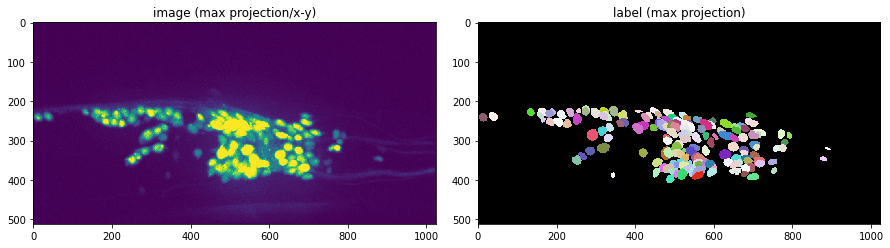

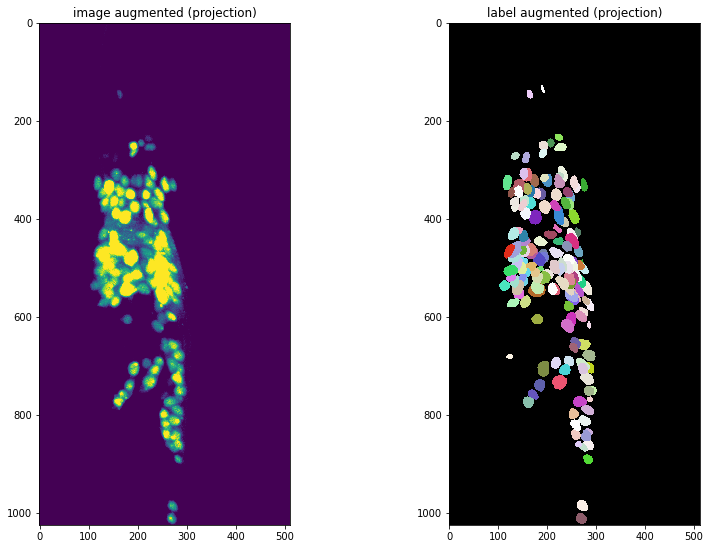

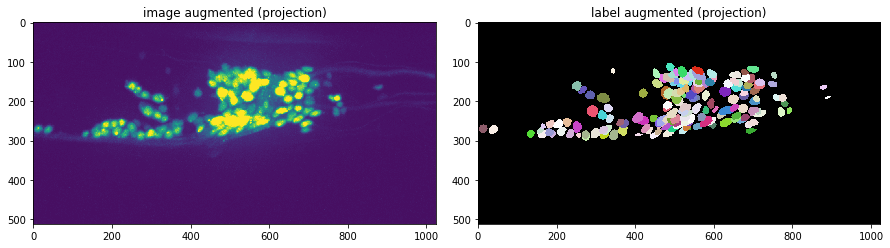

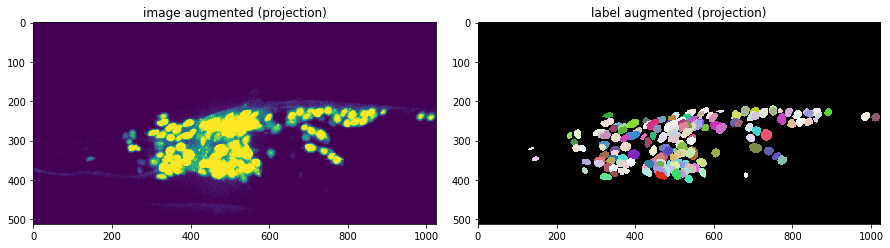

In [4]:
# plot some augmented examples
img, lbl = X[0],Y[0]
sdw.plot_img_label_max_projection(img, lbl)
for _ in range(3):
    img_aug, lbl_aug = sdw.augmenter(img,lbl)
    sdw.plot_img_label_max_projection(img_aug, lbl_aug, img_title="image augmented (projection)", lbl_title="label augmented (projection)")

# Training

The `train` method will train the StarDist model by utilizing the augmented data. The `epochs` parameter can be adjusted to specify a longer or shorter training duration (the default value of 500 is a good starting point).

In [5]:
model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=sdw.augmenter, epochs=500)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x7fc457b4c430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x7fc457b4c430>. Note that functions defined in certain environments, like the i

Epoch 17/500
100/100 [==============================] - 7s 66ms/step - loss: 0.3592 - prob_loss: 0.0314 - dist_loss: 1.6390 - prob_kld: 0.0080 - dist_relevant_mae: 1.6386 - dist_relevant_mse: 5.7346 - dist_dist_iou_metric: 0.6336 - val_loss: 0.2518 - val_prob_loss: 0.0082 - val_dist_loss: 1.2177 - val_prob_kld: 0.0018 - val_dist_relevant_mae: 1.2173 - val_dist_relevant_mse: 2.8269 - val_dist_dist_iou_metric: 0.7153
Epoch 18/500
100/100 [==============================] - 7s 66ms/step - loss: 0.3460 - prob_loss: 0.0307 - dist_loss: 1.5766 - prob_kld: 0.0073 - dist_relevant_mae: 1.5763 - dist_relevant_mse: 5.3654 - dist_dist_iou_metric: 0.6412 - val_loss: 0.2505 - val_prob_loss: 0.0082 - val_dist_loss: 1.2116 - val_prob_kld: 0.0018 - val_dist_relevant_mae: 1.2113 - val_dist_relevant_mse: 2.9912 - val_dist_dist_iou_metric: 0.6856
Epoch 19/500
100/100 [==============================] - 7s 66ms/step - loss: 0.3245 - prob_loss: 0.0311 - dist_loss: 1.4669 - prob_kld: 0.0077 - dist_relevant_mae

Epoch 37/500
100/100 [==============================] - 7s 66ms/step - loss: 0.2932 - prob_loss: 0.0277 - dist_loss: 1.3277 - prob_kld: 0.0056 - dist_relevant_mae: 1.3274 - dist_relevant_mse: 3.9391 - dist_dist_iou_metric: 0.6801 - val_loss: 0.2195 - val_prob_loss: 0.0081 - val_dist_loss: 1.0571 - val_prob_kld: 0.0016 - val_dist_relevant_mae: 1.0568 - val_dist_relevant_mse: 2.3820 - val_dist_dist_iou_metric: 0.7350
Epoch 38/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2992 - prob_loss: 0.0312 - dist_loss: 1.3404 - prob_kld: 0.0062 - dist_relevant_mae: 1.3401 - dist_relevant_mse: 3.9117 - dist_dist_iou_metric: 0.6975 - val_loss: 0.2880 - val_prob_loss: 0.0083 - val_dist_loss: 1.3983 - val_prob_kld: 0.0019 - val_dist_relevant_mae: 1.3980 - val_dist_relevant_mse: 3.4898 - val_dist_dist_iou_metric: 0.6475
Epoch 39/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2893 - prob_loss: 0.0267 - dist_loss: 1.3130 - prob_kld: 0.0051 - dist_relevant_mae

Epoch 57/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2517 - prob_loss: 0.0286 - dist_loss: 1.1156 - prob_kld: 0.0045 - dist_relevant_mae: 1.1153 - dist_relevant_mse: 2.9216 - dist_dist_iou_metric: 0.7411 - val_loss: 0.1819 - val_prob_loss: 0.0078 - val_dist_loss: 0.8707 - val_prob_kld: 0.0013 - val_dist_relevant_mae: 0.8704 - val_dist_relevant_mse: 1.7113 - val_dist_dist_iou_metric: 0.7704
Epoch 58/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2458 - prob_loss: 0.0246 - dist_loss: 1.1058 - prob_kld: 0.0038 - dist_relevant_mae: 1.1055 - dist_relevant_mse: 2.8289 - dist_dist_iou_metric: 0.7366 - val_loss: 0.1777 - val_prob_loss: 0.0076 - val_dist_loss: 0.8509 - val_prob_kld: 0.0011 - val_dist_relevant_mae: 0.8506 - val_dist_relevant_mse: 1.6653 - val_dist_dist_iou_metric: 0.7757
Epoch 59/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2516 - prob_loss: 0.0290 - dist_loss: 1.1129 - prob_kld: 0.0044 - dist_relevant_mae

Epoch 77/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2403 - prob_loss: 0.0273 - dist_loss: 1.0653 - prob_kld: 0.0040 - dist_relevant_mae: 1.0651 - dist_relevant_mse: 2.6556 - dist_dist_iou_metric: 0.7409 - val_loss: 0.1772 - val_prob_loss: 0.0075 - val_dist_loss: 0.8483 - val_prob_kld: 0.0011 - val_dist_relevant_mae: 0.8481 - val_dist_relevant_mse: 1.6296 - val_dist_dist_iou_metric: 0.7841
Epoch 78/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2334 - prob_loss: 0.0271 - dist_loss: 1.0318 - prob_kld: 0.0039 - dist_relevant_mae: 1.0316 - dist_relevant_mse: 2.5054 - dist_dist_iou_metric: 0.7508 - val_loss: 0.2017 - val_prob_loss: 0.0075 - val_dist_loss: 0.9707 - val_prob_kld: 0.0011 - val_dist_relevant_mae: 0.9705 - val_dist_relevant_mse: 1.9724 - val_dist_dist_iou_metric: 0.7482
Epoch 79/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2380 - prob_loss: 0.0271 - dist_loss: 1.0543 - prob_kld: 0.0037 - dist_relevant_mae

100/100 [==============================] - 7s 65ms/step - loss: 0.2271 - prob_loss: 0.0263 - dist_loss: 1.0038 - prob_kld: 0.0035 - dist_relevant_mae: 1.0035 - dist_relevant_mse: 2.3286 - dist_dist_iou_metric: 0.7497 - val_loss: 0.1676 - val_prob_loss: 0.0073 - val_dist_loss: 0.8014 - val_prob_kld: 8.9715e-04 - val_dist_relevant_mae: 0.8011 - val_dist_relevant_mse: 1.3561 - val_dist_dist_iou_metric: 0.7986
Epoch 97/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2137 - prob_loss: 0.0265 - dist_loss: 0.9355 - prob_kld: 0.0032 - dist_relevant_mae: 0.9353 - dist_relevant_mse: 2.0070 - dist_dist_iou_metric: 0.7721 - val_loss: 0.1738 - val_prob_loss: 0.0072 - val_dist_loss: 0.8327 - val_prob_kld: 8.1776e-04 - val_dist_relevant_mae: 0.8325 - val_dist_relevant_mse: 1.5019 - val_dist_dist_iou_metric: 0.7801
Epoch 98/500
100/100 [==============================] - 7s 66ms/step - loss: 0.2307 - prob_loss: 0.0307 - dist_loss: 0.9999 - prob_kld: 0.0039 - dist_relevant_mae: 0.9

100/100 [==============================] - 7s 65ms/step - loss: 0.2124 - prob_loss: 0.0257 - dist_loss: 0.9331 - prob_kld: 0.0030 - dist_relevant_mae: 0.9329 - dist_relevant_mse: 2.0545 - dist_dist_iou_metric: 0.7646 - val_loss: 0.1643 - val_prob_loss: 0.0072 - val_dist_loss: 0.7857 - val_prob_kld: 7.3034e-04 - val_dist_relevant_mae: 0.7855 - val_dist_relevant_mse: 1.2560 - val_dist_dist_iou_metric: 0.8092
Epoch 116/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2169 - prob_loss: 0.0280 - dist_loss: 0.9444 - prob_kld: 0.0032 - dist_relevant_mae: 0.9442 - dist_relevant_mse: 2.0724 - dist_dist_iou_metric: 0.7737 - val_loss: 0.1434 - val_prob_loss: 0.0072 - val_dist_loss: 0.6810 - val_prob_kld: 7.6044e-04 - val_dist_relevant_mae: 0.6808 - val_dist_relevant_mse: 1.0961 - val_dist_dist_iou_metric: 0.8201
Epoch 117/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2072 - prob_loss: 0.0279 - dist_loss: 0.8965 - prob_kld: 0.0031 - dist_relevant_mae: 0

100/100 [==============================] - 7s 65ms/step - loss: 0.2062 - prob_loss: 0.0276 - dist_loss: 0.8930 - prob_kld: 0.0031 - dist_relevant_mae: 0.8928 - dist_relevant_mse: 1.8762 - dist_dist_iou_metric: 0.7796 - val_loss: 0.1355 - val_prob_loss: 0.0072 - val_dist_loss: 0.6417 - val_prob_kld: 7.4502e-04 - val_dist_relevant_mae: 0.6415 - val_dist_relevant_mse: 0.9799 - val_dist_dist_iou_metric: 0.8328
Epoch 135/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1919 - prob_loss: 0.0242 - dist_loss: 0.8386 - prob_kld: 0.0025 - dist_relevant_mae: 0.8384 - dist_relevant_mse: 1.6678 - dist_dist_iou_metric: 0.7786 - val_loss: 0.1607 - val_prob_loss: 0.0072 - val_dist_loss: 0.7676 - val_prob_kld: 7.7451e-04 - val_dist_relevant_mae: 0.7674 - val_dist_relevant_mse: 1.2775 - val_dist_dist_iou_metric: 0.8030
Epoch 136/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1937 - prob_loss: 0.0251 - dist_loss: 0.8427 - prob_kld: 0.0026 - dist_relevant_mae: 0

100/100 [==============================] - 7s 65ms/step - loss: 0.1967 - prob_loss: 0.0295 - dist_loss: 0.8361 - prob_kld: 0.0030 - dist_relevant_mae: 0.8359 - dist_relevant_mse: 1.6631 - dist_dist_iou_metric: 0.7952 - val_loss: 0.1385 - val_prob_loss: 0.0071 - val_dist_loss: 0.6570 - val_prob_kld: 6.5580e-04 - val_dist_relevant_mae: 0.6569 - val_dist_relevant_mse: 0.9912 - val_dist_dist_iou_metric: 0.8291
Epoch 154/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1891 - prob_loss: 0.0258 - dist_loss: 0.8163 - prob_kld: 0.0026 - dist_relevant_mae: 0.8161 - dist_relevant_mse: 1.5631 - dist_dist_iou_metric: 0.7955 - val_loss: 0.1321 - val_prob_loss: 0.0071 - val_dist_loss: 0.6250 - val_prob_kld: 6.7707e-04 - val_dist_relevant_mae: 0.6248 - val_dist_relevant_mse: 0.9229 - val_dist_dist_iou_metric: 0.8375
Epoch 155/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1907 - prob_loss: 0.0274 - dist_loss: 0.8165 - prob_kld: 0.0025 - dist_relevant_mae: 0

100/100 [==============================] - 7s 65ms/step - loss: 0.1846 - prob_loss: 0.0240 - dist_loss: 0.8030 - prob_kld: 0.0024 - dist_relevant_mae: 0.8028 - dist_relevant_mse: 1.5188 - dist_dist_iou_metric: 0.7991 - val_loss: 0.1303 - val_prob_loss: 0.0071 - val_dist_loss: 0.6158 - val_prob_kld: 6.6937e-04 - val_dist_relevant_mae: 0.6158 - val_dist_relevant_mse: 0.8655 - val_dist_dist_iou_metric: 0.8357
Epoch 173/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1861 - prob_loss: 0.0252 - dist_loss: 0.8046 - prob_kld: 0.0024 - dist_relevant_mae: 0.8045 - dist_relevant_mse: 1.5094 - dist_dist_iou_metric: 0.8023 - val_loss: 0.1386 - val_prob_loss: 0.0071 - val_dist_loss: 0.6573 - val_prob_kld: 7.0195e-04 - val_dist_relevant_mae: 0.6572 - val_dist_relevant_mse: 0.9609 - val_dist_dist_iou_metric: 0.8250
Epoch 174/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1883 - prob_loss: 0.0242 - dist_loss: 0.8206 - prob_kld: 0.0023 - dist_relevant_mae: 0

100/100 [==============================] - 7s 65ms/step - loss: 0.1852 - prob_loss: 0.0294 - dist_loss: 0.7787 - prob_kld: 0.0026 - dist_relevant_mae: 0.7786 - dist_relevant_mse: 1.4448 - dist_dist_iou_metric: 0.8127 - val_loss: 0.1235 - val_prob_loss: 0.0070 - val_dist_loss: 0.5824 - val_prob_kld: 5.8953e-04 - val_dist_relevant_mae: 0.5824 - val_dist_relevant_mse: 0.8036 - val_dist_dist_iou_metric: 0.8457
Epoch 192/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1823 - prob_loss: 0.0249 - dist_loss: 0.7869 - prob_kld: 0.0026 - dist_relevant_mae: 0.7867 - dist_relevant_mse: 1.4664 - dist_dist_iou_metric: 0.7887 - val_loss: 0.1324 - val_prob_loss: 0.0072 - val_dist_loss: 0.6259 - val_prob_kld: 7.6873e-04 - val_dist_relevant_mae: 0.6258 - val_dist_relevant_mse: 0.8862 - val_dist_dist_iou_metric: 0.8356
Epoch 193/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1879 - prob_loss: 0.0311 - dist_loss: 0.7837 - prob_kld: 0.0029 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1858 - prob_loss: 0.0286 - dist_loss: 0.7861 - prob_kld: 0.0025 - dist_relevant_mae: 0.7859 - dist_relevant_mse: 1.4404 - dist_dist_iou_metric: 0.8094 - val_loss: 0.1279 - val_prob_loss: 0.0070 - val_dist_loss: 0.6044 - val_prob_kld: 5.8427e-04 - val_dist_relevant_mae: 0.6043 - val_dist_relevant_mse: 0.8449 - val_dist_dist_iou_metric: 0.8428
Epoch 211/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1768 - prob_loss: 0.0259 - dist_loss: 0.7543 - prob_kld: 0.0022 - dist_relevant_mae: 0.7542 - dist_relevant_mse: 1.3432 - dist_dist_iou_metric: 0.8161 - val_loss: 0.1297 - val_prob_loss: 0.0071 - val_dist_loss: 0.6134 - val_prob_kld: 6.2777e-04 - val_dist_relevant_mae: 0.6133 - val_dist_relevant_mse: 0.8726 - val_dist_dist_iou_metric: 0.8381
Epoch 212/500
100/100 [==============================] - 7s 67ms/step - loss: 0.1777 - prob_loss: 0.0242 - dist_loss: 0.7676 - prob_kld: 0.0022 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1832 - prob_loss: 0.0281 - dist_loss: 0.7753 - prob_kld: 0.0026 - dist_relevant_mae: 0.7752 - dist_relevant_mse: 1.4186 - dist_dist_iou_metric: 0.8104 - val_loss: 0.1216 - val_prob_loss: 0.0070 - val_dist_loss: 0.5730 - val_prob_kld: 5.9184e-04 - val_dist_relevant_mae: 0.5729 - val_dist_relevant_mse: 0.7600 - val_dist_dist_iou_metric: 0.8500
Epoch 230/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1740 - prob_loss: 0.0246 - dist_loss: 0.7473 - prob_kld: 0.0021 - dist_relevant_mae: 0.7472 - dist_relevant_mse: 1.3090 - dist_dist_iou_metric: 0.8170 - val_loss: 0.1232 - val_prob_loss: 0.0070 - val_dist_loss: 0.5808 - val_prob_kld: 5.8115e-04 - val_dist_relevant_mae: 0.5808 - val_dist_relevant_mse: 0.8088 - val_dist_dist_iou_metric: 0.8464
Epoch 231/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1733 - prob_loss: 0.0232 - dist_loss: 0.7504 - prob_kld: 0.0020 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1725 - prob_loss: 0.0268 - dist_loss: 0.7286 - prob_kld: 0.0022 - dist_relevant_mae: 0.7284 - dist_relevant_mse: 1.2848 - dist_dist_iou_metric: 0.8132 - val_loss: 0.1188 - val_prob_loss: 0.0070 - val_dist_loss: 0.5595 - val_prob_kld: 5.3249e-04 - val_dist_relevant_mae: 0.5593 - val_dist_relevant_mse: 0.7217 - val_dist_dist_iou_metric: 0.8519
Epoch 249/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1699 - prob_loss: 0.0249 - dist_loss: 0.7248 - prob_kld: 0.0019 - dist_relevant_mae: 0.7247 - dist_relevant_mse: 1.2560 - dist_dist_iou_metric: 0.8236 - val_loss: 0.1242 - val_prob_loss: 0.0069 - val_dist_loss: 0.5861 - val_prob_kld: 5.1226e-04 - val_dist_relevant_mae: 0.5860 - val_dist_relevant_mse: 0.7868 - val_dist_dist_iou_metric: 0.8441
Epoch 250/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1735 - prob_loss: 0.0256 - dist_loss: 0.7395 - prob_kld: 0.0022 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1663 - prob_loss: 0.0233 - dist_loss: 0.7150 - prob_kld: 0.0019 - dist_relevant_mae: 0.7149 - dist_relevant_mse: 1.2113 - dist_dist_iou_metric: 0.8141 - val_loss: 0.1157 - val_prob_loss: 0.0070 - val_dist_loss: 0.5434 - val_prob_kld: 5.5630e-04 - val_dist_relevant_mae: 0.5434 - val_dist_relevant_mse: 0.6914 - val_dist_dist_iou_metric: 0.8563
Epoch 268/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1630 - prob_loss: 0.0227 - dist_loss: 0.7013 - prob_kld: 0.0017 - dist_relevant_mae: 0.7012 - dist_relevant_mse: 1.1766 - dist_dist_iou_metric: 0.8144 - val_loss: 0.1168 - val_prob_loss: 0.0070 - val_dist_loss: 0.5492 - val_prob_kld: 5.5827e-04 - val_dist_relevant_mae: 0.5492 - val_dist_relevant_mse: 0.7033 - val_dist_dist_iou_metric: 0.8550
Epoch 269/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1683 - prob_loss: 0.0259 - dist_loss: 0.7117 - prob_kld: 0.0020 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1630 - prob_loss: 0.0263 - dist_loss: 0.6836 - prob_kld: 0.0019 - dist_relevant_mae: 0.6835 - dist_relevant_mse: 1.1363 - dist_dist_iou_metric: 0.8316 - val_loss: 0.1151 - val_prob_loss: 0.0069 - val_dist_loss: 0.5408 - val_prob_kld: 4.9478e-04 - val_dist_relevant_mae: 0.5407 - val_dist_relevant_mse: 0.6779 - val_dist_dist_iou_metric: 0.8572
Epoch 287/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1595 - prob_loss: 0.0227 - dist_loss: 0.6838 - prob_kld: 0.0017 - dist_relevant_mae: 0.6837 - dist_relevant_mse: 1.1490 - dist_dist_iou_metric: 0.8172 - val_loss: 0.1133 - val_prob_loss: 0.0070 - val_dist_loss: 0.5315 - val_prob_kld: 5.3927e-04 - val_dist_relevant_mae: 0.5315 - val_dist_relevant_mse: 0.6622 - val_dist_dist_iou_metric: 0.8589
Epoch 288/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1559 - prob_loss: 0.0230 - dist_loss: 0.6646 - prob_kld: 0.0016 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1571 - prob_loss: 0.0230 - dist_loss: 0.6704 - prob_kld: 0.0016 - dist_relevant_mae: 0.6703 - dist_relevant_mse: 1.0802 - dist_dist_iou_metric: 0.8328 - val_loss: 0.1124 - val_prob_loss: 0.0069 - val_dist_loss: 0.5272 - val_prob_kld: 5.0847e-04 - val_dist_relevant_mae: 0.5272 - val_dist_relevant_mse: 0.6566 - val_dist_dist_iou_metric: 0.8625
Epoch 306/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1558 - prob_loss: 0.0242 - dist_loss: 0.6575 - prob_kld: 0.0016 - dist_relevant_mae: 0.6575 - dist_relevant_mse: 1.0422 - dist_dist_iou_metric: 0.8344 - val_loss: 0.1138 - val_prob_loss: 0.0069 - val_dist_loss: 0.5343 - val_prob_kld: 4.7887e-04 - val_dist_relevant_mae: 0.5343 - val_dist_relevant_mse: 0.6712 - val_dist_dist_iou_metric: 0.8592
Epoch 307/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1538 - prob_loss: 0.0238 - dist_loss: 0.6498 - prob_kld: 0.0016 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1586 - prob_loss: 0.0227 - dist_loss: 0.6792 - prob_kld: 0.0017 - dist_relevant_mae: 0.6791 - dist_relevant_mse: 1.1109 - dist_dist_iou_metric: 0.8249 - val_loss: 0.1132 - val_prob_loss: 0.0070 - val_dist_loss: 0.5307 - val_prob_kld: 5.9422e-04 - val_dist_relevant_mae: 0.5307 - val_dist_relevant_mse: 0.6684 - val_dist_dist_iou_metric: 0.8585
Epoch 325/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1582 - prob_loss: 0.0260 - dist_loss: 0.6614 - prob_kld: 0.0018 - dist_relevant_mae: 0.6613 - dist_relevant_mse: 1.0687 - dist_dist_iou_metric: 0.8351 - val_loss: 0.1143 - val_prob_loss: 0.0069 - val_dist_loss: 0.5370 - val_prob_kld: 5.1906e-04 - val_dist_relevant_mae: 0.5369 - val_dist_relevant_mse: 0.6819 - val_dist_dist_iou_metric: 0.8586
Epoch 326/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1568 - prob_loss: 0.0238 - dist_loss: 0.6649 - prob_kld: 0.0016 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1692 - prob_loss: 0.0258 - dist_loss: 0.7171 - prob_kld: 0.0021 - dist_relevant_mae: 0.7170 - dist_relevant_mse: 1.2170 - dist_dist_iou_metric: 0.8251 - val_loss: 0.1159 - val_prob_loss: 0.0070 - val_dist_loss: 0.5445 - val_prob_kld: 6.1668e-04 - val_dist_relevant_mae: 0.5444 - val_dist_relevant_mse: 0.6964 - val_dist_dist_iou_metric: 0.8521
Epoch 344/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1597 - prob_loss: 0.0256 - dist_loss: 0.6707 - prob_kld: 0.0019 - dist_relevant_mae: 0.6706 - dist_relevant_mse: 1.0837 - dist_dist_iou_metric: 0.8280 - val_loss: 0.1151 - val_prob_loss: 0.0070 - val_dist_loss: 0.5402 - val_prob_kld: 6.0650e-04 - val_dist_relevant_mae: 0.5401 - val_dist_relevant_mse: 0.6852 - val_dist_dist_iou_metric: 0.8561
Epoch 345/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1545 - prob_loss: 0.0250 - dist_loss: 0.6473 - prob_kld: 0.0017 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1554 - prob_loss: 0.0243 - dist_loss: 0.6555 - prob_kld: 0.0017 - dist_relevant_mae: 0.6554 - dist_relevant_mse: 1.0411 - dist_dist_iou_metric: 0.8365 - val_loss: 0.1106 - val_prob_loss: 0.0069 - val_dist_loss: 0.5186 - val_prob_kld: 4.7052e-04 - val_dist_relevant_mae: 0.5186 - val_dist_relevant_mse: 0.6292 - val_dist_dist_iou_metric: 0.8645
Epoch 363/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1556 - prob_loss: 0.0259 - dist_loss: 0.6484 - prob_kld: 0.0018 - dist_relevant_mae: 0.6483 - dist_relevant_mse: 1.0294 - dist_dist_iou_metric: 0.8278 - val_loss: 0.1089 - val_prob_loss: 0.0070 - val_dist_loss: 0.5096 - val_prob_kld: 5.5064e-04 - val_dist_relevant_mae: 0.5096 - val_dist_relevant_mse: 0.6297 - val_dist_dist_iou_metric: 0.8650
Epoch 364/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1541 - prob_loss: 0.0261 - dist_loss: 0.6402 - prob_kld: 0.0017 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1575 - prob_loss: 0.0238 - dist_loss: 0.6685 - prob_kld: 0.0016 - dist_relevant_mae: 0.6685 - dist_relevant_mse: 1.0874 - dist_dist_iou_metric: 0.8298 - val_loss: 0.1120 - val_prob_loss: 0.0070 - val_dist_loss: 0.5252 - val_prob_kld: 5.5549e-04 - val_dist_relevant_mae: 0.5251 - val_dist_relevant_mse: 0.6660 - val_dist_dist_iou_metric: 0.8569
Epoch 382/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1536 - prob_loss: 0.0233 - dist_loss: 0.6517 - prob_kld: 0.0016 - dist_relevant_mae: 0.6516 - dist_relevant_mse: 1.0370 - dist_dist_iou_metric: 0.8305 - val_loss: 0.1128 - val_prob_loss: 0.0070 - val_dist_loss: 0.5289 - val_prob_kld: 6.2155e-04 - val_dist_relevant_mae: 0.5289 - val_dist_relevant_mse: 0.6554 - val_dist_dist_iou_metric: 0.8584
Epoch 383/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1578 - prob_loss: 0.0254 - dist_loss: 0.6621 - prob_kld: 0.0018 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1483 - prob_loss: 0.0245 - dist_loss: 0.6192 - prob_kld: 0.0015 - dist_relevant_mae: 0.6191 - dist_relevant_mse: 0.9452 - dist_dist_iou_metric: 0.8129 - val_loss: 0.1101 - val_prob_loss: 0.0069 - val_dist_loss: 0.5158 - val_prob_kld: 5.1293e-04 - val_dist_relevant_mae: 0.5157 - val_dist_relevant_mse: 0.6432 - val_dist_dist_iou_metric: 0.8624
Epoch 401/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1554 - prob_loss: 0.0262 - dist_loss: 0.6461 - prob_kld: 0.0017 - dist_relevant_mae: 0.6460 - dist_relevant_mse: 1.0230 - dist_dist_iou_metric: 0.8372 - val_loss: 0.1072 - val_prob_loss: 0.0070 - val_dist_loss: 0.5012 - val_prob_kld: 5.3767e-04 - val_dist_relevant_mae: 0.5012 - val_dist_relevant_mse: 0.6068 - val_dist_dist_iou_metric: 0.8674
Epoch 402/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1529 - prob_loss: 0.0250 - dist_loss: 0.6398 - prob_kld: 0.0016 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1583 - prob_loss: 0.0277 - dist_loss: 0.6533 - prob_kld: 0.0018 - dist_relevant_mae: 0.6532 - dist_relevant_mse: 1.0491 - dist_dist_iou_metric: 0.8392 - val_loss: 0.1118 - val_prob_loss: 0.0070 - val_dist_loss: 0.5243 - val_prob_kld: 5.3360e-04 - val_dist_relevant_mae: 0.5242 - val_dist_relevant_mse: 0.6501 - val_dist_dist_iou_metric: 0.8624
Epoch 420/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1560 - prob_loss: 0.0287 - dist_loss: 0.6361 - prob_kld: 0.0018 - dist_relevant_mae: 0.6360 - dist_relevant_mse: 0.9897 - dist_dist_iou_metric: 0.8437 - val_loss: 0.1077 - val_prob_loss: 0.0069 - val_dist_loss: 0.5040 - val_prob_kld: 5.1736e-04 - val_dist_relevant_mae: 0.5040 - val_dist_relevant_mse: 0.6103 - val_dist_dist_iou_metric: 0.8670
Epoch 421/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1555 - prob_loss: 0.0269 - dist_loss: 0.6430 - prob_kld: 0.0017 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1530 - prob_loss: 0.0266 - dist_loss: 0.6321 - prob_kld: 0.0016 - dist_relevant_mae: 0.6320 - dist_relevant_mse: 0.9709 - dist_dist_iou_metric: 0.8451 - val_loss: 0.1084 - val_prob_loss: 0.0070 - val_dist_loss: 0.5074 - val_prob_kld: 5.2939e-04 - val_dist_relevant_mae: 0.5073 - val_dist_relevant_mse: 0.6121 - val_dist_dist_iou_metric: 0.8676
Epoch 439/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1499 - prob_loss: 0.0245 - dist_loss: 0.6268 - prob_kld: 0.0015 - dist_relevant_mae: 0.6267 - dist_relevant_mse: 0.9605 - dist_dist_iou_metric: 0.8351 - val_loss: 0.1074 - val_prob_loss: 0.0070 - val_dist_loss: 0.5020 - val_prob_kld: 5.3443e-04 - val_dist_relevant_mae: 0.5019 - val_dist_relevant_mse: 0.6020 - val_dist_dist_iou_metric: 0.8672
Epoch 440/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1494 - prob_loss: 0.0236 - dist_loss: 0.6290 - prob_kld: 0.0014 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1489 - prob_loss: 0.0242 - dist_loss: 0.6238 - prob_kld: 0.0015 - dist_relevant_mae: 0.6237 - dist_relevant_mse: 0.9468 - dist_dist_iou_metric: 0.8430 - val_loss: 0.1097 - val_prob_loss: 0.0069 - val_dist_loss: 0.5141 - val_prob_kld: 4.7797e-04 - val_dist_relevant_mae: 0.5141 - val_dist_relevant_mse: 0.6232 - val_dist_dist_iou_metric: 0.8639
Epoch 458/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1475 - prob_loss: 0.0227 - dist_loss: 0.6236 - prob_kld: 0.0014 - dist_relevant_mae: 0.6236 - dist_relevant_mse: 0.9421 - dist_dist_iou_metric: 0.8390 - val_loss: 0.1078 - val_prob_loss: 0.0069 - val_dist_loss: 0.5043 - val_prob_kld: 4.7722e-04 - val_dist_relevant_mae: 0.5043 - val_dist_relevant_mse: 0.6080 - val_dist_dist_iou_metric: 0.8656
Epoch 459/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1467 - prob_loss: 0.0228 - dist_loss: 0.6196 - prob_kld: 0.0014 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1470 - prob_loss: 0.0230 - dist_loss: 0.6198 - prob_kld: 0.0014 - dist_relevant_mae: 0.6198 - dist_relevant_mse: 0.9526 - dist_dist_iou_metric: 0.8466 - val_loss: 0.1059 - val_prob_loss: 0.0069 - val_dist_loss: 0.4948 - val_prob_kld: 5.0475e-04 - val_dist_relevant_mae: 0.4948 - val_dist_relevant_mse: 0.5890 - val_dist_dist_iou_metric: 0.8687
Epoch 477/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1436 - prob_loss: 0.0201 - dist_loss: 0.6173 - prob_kld: 0.0012 - dist_relevant_mae: 0.6173 - dist_relevant_mse: 0.9251 - dist_dist_iou_metric: 0.8371 - val_loss: 0.1065 - val_prob_loss: 0.0068 - val_dist_loss: 0.4981 - val_prob_kld: 4.2683e-04 - val_dist_relevant_mae: 0.4980 - val_dist_relevant_mse: 0.5957 - val_dist_dist_iou_metric: 0.8676
Epoch 478/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1500 - prob_loss: 0.0238 - dist_loss: 0.6310 - prob_kld: 0.0016 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1483 - prob_loss: 0.0248 - dist_loss: 0.6171 - prob_kld: 0.0015 - dist_relevant_mae: 0.6170 - dist_relevant_mse: 0.9509 - dist_dist_iou_metric: 0.8323 - val_loss: 0.1051 - val_prob_loss: 0.0069 - val_dist_loss: 0.4911 - val_prob_kld: 4.7124e-04 - val_dist_relevant_mae: 0.4910 - val_dist_relevant_mse: 0.5862 - val_dist_dist_iou_metric: 0.8686
Epoch 496/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1489 - prob_loss: 0.0249 - dist_loss: 0.6201 - prob_kld: 0.0016 - dist_relevant_mae: 0.6200 - dist_relevant_mse: 0.9451 - dist_dist_iou_metric: 0.8286 - val_loss: 0.1030 - val_prob_loss: 0.0069 - val_dist_loss: 0.4804 - val_prob_kld: 4.7553e-04 - val_dist_relevant_mae: 0.4804 - val_dist_relevant_mse: 0.5615 - val_dist_dist_iou_metric: 0.8716
Epoch 497/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1497 - prob_loss: 0.0258 - dist_loss: 0.6192 - prob_kld: 0.0016 - dist_relevant_mae: 0

# Threshold optimization

While the default values for the probability and non-maximum suppression thresholds already yield good results in many cases, we still recommend to adapt the thresholds to your data. The optimized threshold values are saved to disk and will be automatically loaded with the model.

In [9]:
model.optimize_thresholds(X_val, Y_val)

NMS threshold = 0.5:  75%|█████████████████████████████████████████████████████████████████████████████████                           | 15/20 [00:30<00:10,  2.01s/it, 0.637 -> 0.941]


Using optimized values: prob_thresh=0.637042, nms_thresh=0.3.
Saving to 'thresholds.json'.


{'prob': 0.6370415476805565, 'nms': 0.3}

# Evaluation the segmentation use the trained model

In this section, the labels for the first validation image is predicted and shown. If only one 3D image/label was provided for training, the prediction for this training image will be calculated instead of the validation images.

In [10]:
Y0_val_pred = model.predict_instances(X_val[0], n_tiles=model._guess_n_tiles(X_val[0]), show_tile_progress=False)[0]

Plot a GT/prediction example  

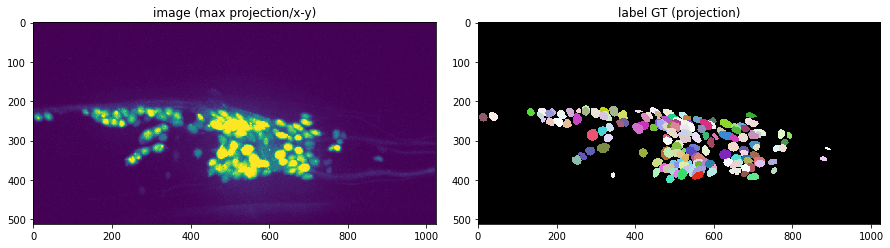

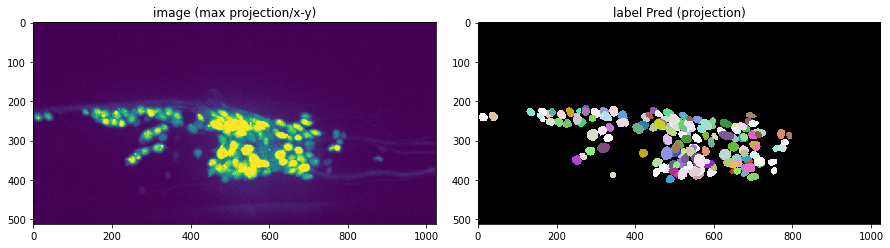

In [11]:
sdw.plot_img_label_max_projection(X_val[0],Y_val[0], lbl_title="label GT (projection)")
sdw.plot_img_label_max_projection(X_val[0],Y0_val_pred, lbl_title="label Pred (projection)")